<a href="https://colab.research.google.com/github/Dgab8898/Stock_Forecast_LTSM_Project/blob/master/Forecasting_Ford_Stock_using_LSTM_Neural_Network_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Problem Statement:
Stock price forecasting is one of the most critical issues during the stock market trading,
The traditional approches make the time-series prediction still challenging. With the development
of artificial intelligence, high performance algorithms make reliable prediction possible from
the data prespective.
This project propose Long Short-Term Meonory(LSTM)neural network based model to look into
Ford Stodk prices.
This problem where given a year and month, the task to predict the Ford stock price.
The data source is imported form yahoo finance https://query1.finance.yahoo.com/v7/finance/download/Fperiod1,
the data ranges from 22/07/2019 to 20/07/2017, 
with 252 entries.

Step to build Ford stock prediction model
Data Preprocessing
Building the RNN
Making the prediction and visualisation

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving F.csv to F.csv


In [ ]:

for fn in uploaded.keys():
  print('F.cv"{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

F.cv"F.csv" with length 16480 bytes


In [ ]:
import sys
import tensorflow.keras
import sklearn as sk
import tensorflow as tf
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
print(f"Tensor Flow Version: {tf.__version__}")
print(f"keras Version: {tensorflow.keras.__version__}")
print()
print(f"python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-learn {sk.__version__}")
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

Tensor Flow Version: 2.2.0
keras Version: 2.3.0-tf

python 3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]
Pandas 1.0.5
Scikit-learn 0.22.2.post1
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is available


In [ ]:
pwd


'/Users/david'

In [ ]:
Download the dataset:

In [ ]:
Data preprocessing 

In [ ]:
df = pd.read_csv('F.csv',parse_dates=True,index_col='Date')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2019-07-22 to 2020-07-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


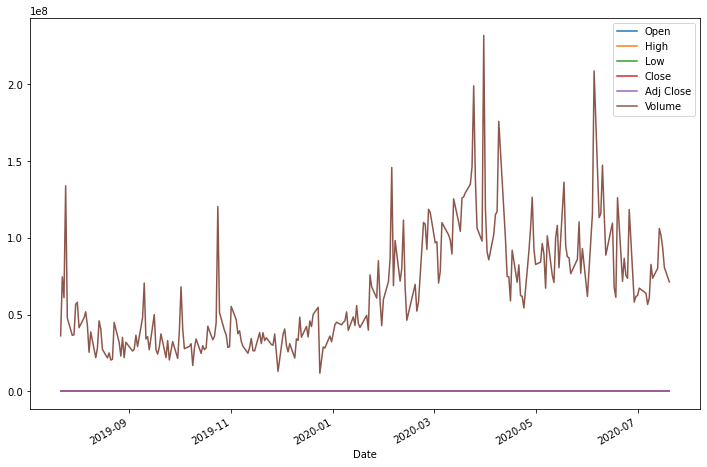

In [ ]:
df.plot(figsize=(12,8))

In [ ]:
len(df)

252

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-07-22,10.13,10.17,10.00,10.02,9.693360,36238600
2019-07-23,10.13,10.22,10.06,10.17,9.838470,74624800
2019-07-24,10.18,10.35,10.14,10.33,9.993254,61107500
2019-07-25,9.75,9.78,9.40,9.56,9.248356,133898600
2019-07-26,9.58,9.65,9.51,9.57,9.258030,47710200


In [ ]:
test_size = 18
test_ind = len(df) - test_size

In [ ]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [ ]:
train

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-07-22,10.13,10.17,10.00,10.02,9.693360,36238600
2019-07-23,10.13,10.22,10.06,10.17,9.838470,74624800
2019-07-24,10.18,10.35,10.14,10.33,9.993254,61107500
2019-07-25,9.75,9.78,9.40,9.56,9.248356,133898600
2019-07-26,9.58,9.65,9.51,9.57,9.258030,47710200
...,...,...,...,...,...,...
2020-06-17,6.56,6.56,6.31,6.33,6.330000,67732200
2020-06-18,6.26,6.45,6.19,6.33,6.330000,61301800
2020-06-19,6.64,6.69,6.23,6.23,6.230000,126127800


In [ ]:
test

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-24,6.06,6.12,5.86,5.95,5.95,75536300
2020-06-25,5.86,6.05,5.80,6.03,6.03,73612700
2020-06-26,6.04,6.07,5.81,5.91,5.91,118435400
2020-06-29,5.91,6.07,5.81,6.01,6.01,58208400
2020-06-30,5.98,6.10,5.90,6.08,6.08,61909300
2020-07-01,6.10,6.18,5.95,5.98,5.98,62454700
2020-07-02,6.10,6.17,6.00,6.05,6.05,67270500
2020-07-06,6.14,6.20,6.11,6.19,6.19,63921800
2020-07-07,6.14,6.20,6.09,6.12,6.12,56652000


LSTMs are sensitive to the scale of the data input. its can be a goood practice to
rescale the data to the range of 0-1, also called normalizing. we easily normalise the
dataset using the MinMaxScaler preprocessing class from the scikit-learn library/

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
scaled_train = scaler.transform(train)

In [ ]:
scaled_test = scaler.transform(test)

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

With time series data, the sequence values is important. A simple method that we can use
and length of test and trian dataset and to calculate the indect of split point and separates
the data into the training datasets into 234 periods of the total periods that we can use to
train our model, leaving the remaing 18 periods for testing the model

In [ ]:
len(test)

18

In [ ]:
length = 12
generator = TimeseriesGenerator(scaled_full_data,scaled_full_data,
                                length=length,batch_size=1)


NameError: ignored

In [ ]:
x,y = generator[0]

NameError: ignored

In [ ]:
x

NameError: ignored

In [ ]:
y

In [ ]:
scaled_train

array([[0.99153976, 0.96964587, 0.97734628, 0.95094937, 0.94987778,
        0.11075431],
       [0.99153976, 0.97807757, 0.98705502, 0.97468354, 0.97413046,
        0.28530115],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        0.2238363 ],
       ...,
       [0.40101523, 0.38279933, 0.36731392, 0.35126582, 0.37103556,
        0.5194917 ],
       [0.33840948, 0.31365936, 0.35113269, 0.35917722, 0.37939222,
        0.27211221],
       [0.34856176, 0.33052277, 0.35275081, 0.33860759, 0.35766491,
        0.3400849 ]])

In [ ]:
# LSTM Model
The Stock price changes with time and other influential factors. 
It is suitable to utilize LSTM model to explore the market mechanism from the relevant data.
The architecture of the proposed LSTM model is deployed.
The dimension of input data is decided according to the number of influential factors
of stocks price. The LSTM layer is embedded to memorize and extract containing
information from input data, where the ADAM optimizer is used to update
the weights and bias and the mean square error is set as the fitness function. 
The final output is given by a fully connected layer after the termination condition
is reached.



In [ ]:

 # To determine which version you're using:
!pip show tensorflow

# For the current version: 
!pip install --upgrade tensorflow

# For a specific version:
!pip install tensorflow==1.2

# For the latest nightly build:
!pip install tf-nightly

Name: tensorflow
Version: 2.2.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: scipy, numpy, absl-py, gast, protobuf, wheel, google-pasta, tensorboard, tensorflow-estimator, keras-preprocessing, six, h5py, termcolor, opt-einsum, grpcio, astunparse, wrapt
Required-by: fancyimpute
Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.2.0)
     |████████████████████████████████| 35.0MB 118kB/s 
     |████████████████████████████████| 890kB 39.8MB/s 
     |████████████████████████████████| 245kB 40.8MB/s 
  Created wheel for html5lib: filename=html5lib-0.9999999-cp36-none-any.whl size=107220 sha256=1c66dae316628d97b5a2b59e88708a3c96cc5bd9dad65e60002aaf25ed3a922e
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c83

     |████████████████████████████████| 324.5MB 48kB/s 
     |████████████████████████████████| 6.8MB 42.7MB/s 
     |████████████████████████████████| 460kB 42.2MB/s 
     |████████████████████████████████| 92kB 3.5MB/s 
ERROR: tensorflow 1.2.0 has requirement markdown==2.2.0, but you'll have markdown 3.2.2 which is incompatible.
  Found existing installation: Markdown 2.2.0
    Uninstalling Markdown-2.2.0:
      Successfully uninstalled Markdown-2.2.0


In [ ]:
from tensorflow.keras.layers import Dense, LSTM
from keras.models import Sequential

In [ ]:
n_features =1

In [ ]:
model = Sequential()
model.add(LSTM(100,activation='relu', input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

TypeError: ignored

In [ ]:
model.summary()

NameError: ignored

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='v1_loss',patience=2)

In [ ]:
validation_generator = timeseriesGenerator(scaled_test,scaled_test,
                                          length=length,batch_size=1)

In [ ]:
model.fit_generator(generator,epochs=20,
                   validation_data=validation_generator,
                   callback=[early_stop])

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses.plot()

In [ ]:
test_prediction = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))


for i in range(len(test)):
    
    # get prediction 1 time stamp a head ([0] is for grabbing just the number ins)
    current_pred = model.predict(current_batch)[0]
    
    # stock prediction
    test_predictions.append(current_pred)
    
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(curren_batch[:,1:,:],[[currend_pred]],axis=1)

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['prediction'] = true_predictions

In [ ]:
test

In [ ]:
test.plot(figsize=(12,8))

In [ ]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [ ]:
length = 12
generator = TimeseriesGenerator(scaled_full_data,scaled_full_data
                                length=length,batch_size=1)

In [ ]:
model = sequential()
model.add(LSTM(100,activation='relu',input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

model.fit_generator(generator,epochs=8)

In [ ]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 12

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))


for i in range(periods):
    
    # get prediction 1 time stamp a head ([0] is for grabbing just the number ins)
    current_pred = model.predict(current_batch)[0]
    
    # stock prediction
    test_predictions.append(current_pred)
    
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(curren_batch[:,1:,:],[[currend_pred]],axis=1)

In [ ]:
forecast = scaler.inverse_transform(forecast)

In [ ]:
df

In [ ]:
forecast_index = pd.date_range(start='2020-07-21',periods=periods,
                             freq="MS")

In [ ]:
forecast_df = pd.DataFrame(data=forcast,index=forcast_index,
                          columns=['Forecast'])

In [ ]:
forcast_df

In [ ]:
df.plot()
forcast_df.plot()

In [ ]:
ax = df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2020-01-01','2020-12-01)

In [ ]:
In this project, we developed LSTM recurrent neural networks for time series forecasting 
in Python with the Keras deeplearning network.

References:
machinelearningmastery.com/time-series-forecasting-lstm-recurrent-neural-networks-python-keras
https://query1.finance.yahoo.com/v7/finance/download/Fperiod1=1563689894&period2=1595312294&interval=1d&events=history, https://finance.yahoo.com/quote/F/history?p=F
https://scikit-learn.org/stable/modules/neural_networks_supervised.html
https://towardsdatascience.com/recurrent-neural-networks-by-example-in-python-ffd204f99470
Tong et al., 2019 W. Tong, L. Li, X. Zhou, A. Hamilton, K. Zhang
Deep learning PM2.5 concentrations with bidirectional LSTM RNN